# Représentation des nombres en calcul scientifique

Dans ce chapitre, nous explorons la manière dont les nombres sont représentés dans les ordinateurs, les conséquences de cette représentation sur les calculs numériques, et les erreurs qui en découlent. Nous aborderons également des exemples spécifiques pour illustrer les concepts théoriques, avec des implémentations pratiques en Python.

In [15]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt

## Introduction

Les ordinateurs utilisent une représentation limitée des nombres réels en raison de contraintes matérielles. Cette représentation peut entraîner des erreurs d'approximation, des problèmes d'arrondi, et des limitations dans les calculs. Nous discuterons ici de plusieurs concepts clés :

1. Représentation des nombres tels que $e$ et $e^x$.
2. Propriétés des représentations numériques en double précision et simple précision (IEEE 754).
3. Analyse des erreurs d'arrondi et d'annulation.
4. Étude des différences finies comme méthode d'approximation des dérivées.

---

## Approximation des constantes mathématiques

### Le nombre d'Euler $e$

Le nombre d'Euler, noté $e$, est défini comme suit :

$$
e = \lim_{n\to\infty}\left( 1 + \frac{1}{n} \right)^n.$$
Cette définition théorique implique que les valeurs calculées pour 
$$e_n = \left(1 + \frac{1}{n} \right)^n$$
devraient s'approcher de $e$ à mesure que $n$ augmente. Cependant, en pratique, la précision de cette suite dépend des limitations de la représentation numérique dans l'ordinateur.

Nous calculons et comparons les approximations numériques de $e$ pour différentes valeurs de $n$ :


In [16]:
# Approximation de e
print('10^i \t\t e_n \t\t\t e_n - e')
for i in range(1,16):
    n = 10.0 ** i; en = (1 + 1/n) ** n
    print('10^%2d \t %20.15f \t %20.15f' % (i, en, en-np.e))

10^i 		 e_n 			 e_n - e
10^ 1 	    2.593742460100002 	   -0.124539368359043
10^ 2 	    2.704813829421528 	   -0.013467999037517
10^ 3 	    2.716923932235594 	   -0.001357896223452
10^ 4 	    2.718145926824926 	   -0.000135901634120
10^ 5 	    2.718268237192297 	   -0.000013591266748
10^ 6 	    2.718280469095753 	   -0.000001359363292
10^ 7 	    2.718281694132082 	   -0.000000134326963
10^ 8 	    2.718281798347358 	   -0.000000030111687
10^ 9 	    2.718282052011560 	    0.000000223552515
10^10 	    2.718282053234788 	    0.000000224775742
10^11 	    2.718282053357110 	    0.000000224898065
10^12 	    2.718523496037238 	    0.000241667578193
10^13 	    2.716110034086901 	   -0.002171794372144
10^14 	    2.716110034087023 	   -0.002171794372022
10^15 	    3.035035206549262 	    0.316753378090217



### La fonction exponentielle $e^x$

La fonction exponentielle peut être approximée à l'aide de la série de Taylor :

$$
e^x = \sum_{k=0}^\infty \frac{x^k}{k!} = 1 + x + \frac{x^2}{2} + \frac{x^3}{6} + \dots
$$

L'ordinateur ne calcule que des séries partielles :

$$
s_i(x) = \sum_{k=0}^{i} \frac{x^k}{k!}
$$

Le reste de Taylor est donné par :

$$
e^x - s_i(x) = \frac{e^\xi x^{i+1}}{(i+1)!}, \quad \text{avec } \xi \in [0, x]
$$

L'erreur relative peut être contrôlée en choisissant un indice $i$ tel que :

$$
\frac{|x|^{i+1}}{(i+1)!} \leq \tau s_i(x)
$$

L'implémentation suivante calcule la valeur approximée de $e^x$ avec une tolérance $\tau$ donnée :


In [17]:
def expeval(x, tol):
    # Approximation de e^x
    s = 1; k = 1
    term = 1
    while (abs(term) > tol * abs(s)):
        term = term * x / k
        s += term
        k += 1
    return s

# Calcul de e^x pour des valeurs choisies
# Reproduisez ici le tableau demandé

---

## Représentation numérique : IEEE 754

La norme IEEE 754 est utilisée pour représenter les nombres réels en mémoire. En Python, les calculs en virgule flottante utilisent par défaut la double précision. Voici quelques propriétés importantes de cette norme :

- **Précision simple (`float32`)** : Moins précise, mais consomme moins de mémoire.
- **Précision double (`float64`)** : Plus précise, utilisée par défaut.
- **Infini et NaN** : La division par zéro peut produire un résultat infini ($\infty$) ou une valeur non définie (`NaN`).

Exemples en Python :


In [ ]:
import sys
sys.float_info.min             # 2.2251e-308
sys.float_info.max             # 1.7977e+308

In [18]:

1 / 0                          # Erreur (division par zéro)


ZeroDivisionError: division by zero

In [ ]:
float('inf') - float('inf')    # nan

**Remarque** : En Python pur, la division par zéro produit une erreur. En revanche, `numpy` respecte IEEE 754 :

In [19]:
1 / np.float64(0)  # Renvoie inf

C:\Users\HP\AppData\Local\Temp\ipykernel_13048\4201507300.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  1 / np.float64(0)  # Renvoie inf


np.float64(inf)

---

## Erreurs d'arrondi

Les erreurs d'arrondi se produisent lorsque la précision est insuffisante pour représenter un nombre. Voici un exemple où l'on utilise des variables en `float16` pour observer les différences d'approximation :

### Somme de nombres alternés


In [20]:
n = 1000  # Exemple avec 1000 points
t = np.sin(np.linspace(0, 1, n))
y = np.linspace(0, 1, n) 
y[1::2] = -1 * y[1::2]

# Réduction de précision
x = np.float16(y) 
r = np.float16(t)

# Somme en double et simple précision
print('Somme (np.float64) : %1.20f' % sum(y*t))
print('Somme (np.float16) : %1.20f' % sum(x*r))

Somme (np.float64) : -0.42108128157976970618
Somme (np.float16) : -0.42236328125000000000


---

## Erreurs d'annulation

Lorsque deux nombres proches sont soustraits, des chiffres significatifs peuvent être perdus, amplifiant l'erreur. Par exemple :

$$
f(x) = \frac{1 - \cos(x)}{x^2}
$$

Implémentation :


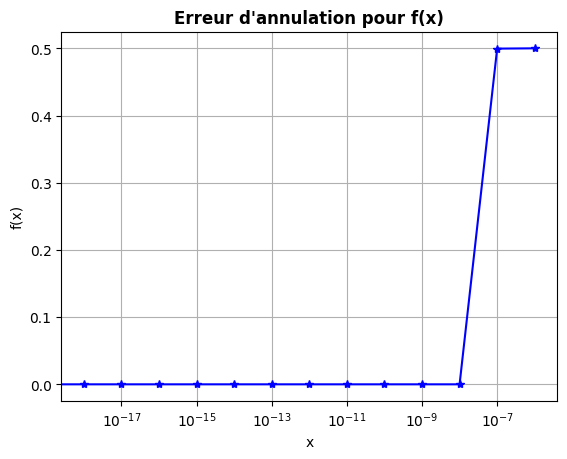

In [21]:
def f(x):
    return (1 - np.cos(x)) / (x**2)

# Calcul pour différentes bases
b = 10
k = np.array(np.arange(6, 20))
x = 1 / b**k

plt.semilogx(x, f(x), 'b*-')
plt.xlabel('x'); plt.ylabel('f(x)')
plt.title('Erreur d\'annulation pour f(x)', fontweight='bold')
plt.grid()
plt.show()

---

## Différences finies

Les différences finies sont utilisées pour approximer les dérivées :

$$
f'(x_0) = \lim_{h\to0} \frac{f(x_0+h) - f(x_0)}{h}
$$

Pour $f(x) = e^x$ et $x_0 = 0$, nous pouvons calculer l'erreur d'approximation :


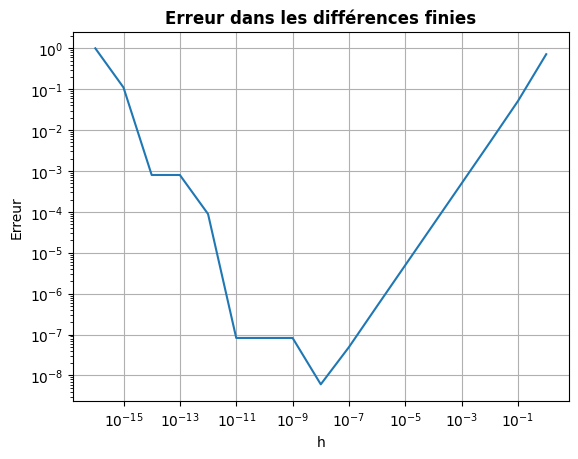

In [22]:
def f(x):
    return np.exp(x)
x0 = 0
k = np.array(range(0, 17))
h = 1 / 10**k

# Différences finies
fprime = (f(x0 + h) - f(x0)) / h

# Erreur
errH = np.abs(np.exp(x0) - fprime)

plt.loglog(h, errH)
plt.xlabel('h'); plt.ylabel('Erreur')
plt.title('Erreur dans les différences finies', fontweight='bold')
plt.grid()
plt.show()